In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import date
from statsmodels.formula.api import ols
import statsmodels.api as sm
from matplotlib import colors

### Create regression data

In [3]:
lda_path = '../../data/lda_merged_chs_20211216_no_crossover/'

In [4]:
fandom_list = ['harry_potter',
 'dcu',
 'doctor_who_&_related_fandoms',
 'star_wars_all_media_types',
 'arthurian_mythology_&_related_fandoms',
 'supernatural',
 'haikyuu',
 'kuroko_no_basuke',
 'hamilton_miranda',
 'dragon_age_all_media_types',
 'the_walking_dead_&_related_fandoms',
 'buffy_the_vampire_slayer',
#  'les_miserables_all_media_types',
 'naruto',
 'tolkien_j_r_r_works_&_related_fandoms',
 'shakespare_william_works',
 'hetalia_axis_powers',
 'attack_on_titan',
 'ms_paint_adventures',
 'marvel',
 'bishoujo_senshi_sailor_moon',
 'one_direction',
 'sherlock_holmes_&_related_fandoms']

In [5]:
def first_rel(field):
    try:
        return field.split(',')[0]
    except:
        return field

In [6]:
def find_major_rel(df):
    df['Relationship'] = df.apply(lambda row: first_rel(row['Relationship']), axis=1)
    counts = df['Relationship'].value_counts()
    return counts.keys()[0:5]


In [86]:
def date_today(cell):
    try:
        y, m, d = cell.split('-')
        return abs(date.today() - date(int(y), int(m), int(d))).days
    except:
        return float('nan')

In [ ]:
def find_history(field_list):
    field_list = [10000000 if np.isnan(x) else x for x in field_list]
    return np.amin(field_list)

In [102]:
df_all = []
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(lda_path,fandom + '_lda_with_dist_merged_chs_no_crossover_20211216.tsv'), sep ='\t',  quotechar=None, quoting=3)
    del df['index']
#     del df_lda['Chapters']
#     print(sorted(df_tfidf.Kudos.tolist())[0:10])
#     print(sorted(df_lda.Kudos.tolist())[0:10])
    df['UpdateDate'] = df['UpdateDate'].astype('object')

    df['fandom_category'] = fandom    

    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)
    print(len(df[df.Kudos == 0]))
    freq_rel = find_major_rel(df)
    df['Relationship'] = df['Relationship'].apply(lambda x: first_rel(x))
    df['Freq_relationship'] = df['Relationship'].apply(lambda x: 1 if x in freq_rel else 0)
    del df['Relationship']
    
    # history of the fic
    df['PublishDate'] = df.apply(lambda row: date_today(row['PublishDate']), axis = 1)
    df['CompleteDate'] = df.apply(lambda row: date_today(row['CompleteDate']), axis = 1)
    df['UpdateDate'] = df.apply(lambda row: date_today(row['UpdateDate']), axis = 1)
    df['history'] = df.apply(lambda row: find_history([row['PublishDate'], row['CompleteDate'], row['UpdateDate']]), axis=1)
    
    # control variables for author
    author_kudos_dic = {}
    author_history_dic = {}
    for author in list(set(df['Author'])):
        temp = df[df['Author']==author]
        author_ave = np.average(temp['Kudos'])
        author_kudos_dic[author] = author_ave
        try:
            author_history_dic[author] = max(temp['history'])
        except:
            print(temp['history'])
            
    df = df.dropna(subset=['Author'])
    
    counts = df['Author'].value_counts()
#     idx = counts[counts >= 10].index
    
    df['author_fic_cnt'] = df['Author'].apply(lambda x: counts[x])
    df['author_kudos_ave'] = df['Author'].apply(lambda x: author_kudos_dic[x])
    df['author_history'] = df['Author'].apply(lambda x: author_history_dic[x])
        
    df_all.append(df)


1613
152
626
231
Series([], Name: history, dtype: float64)
167
1281
25
16
4
501
50
439
210
1322
5
259
176
287
Series([], Name: history, dtype: float64)
382
Series([], Name: history, dtype: float64)
36
192
402


In [103]:
df_all = pd.concat(df_all)

In [104]:
len(df_all)

540975

In [105]:
len(set(df_all['Author']))

109428

In [106]:
np.percentile(df_all['JSD'], 99.9)

0.6825186330754428

In [107]:
df_all[df_all['Title'].str.contains('Groot')]

,AdditionalTags,ArchiveWarnings,Author,Category,Chapters,Characters,Fandoms,Kudos,Language,Rating,...,Bookmarks,URL,Dist,JSD,fandom_category,Freq_relationship,history,author_fic_cnt,author_kudos_ave,author_history


In [109]:
df_all.columns.values

array(['AdditionalTags', 'ArchiveWarnings', 'Author', 'Category',
       'Chapters', 'Characters', 'Fandoms', 'Kudos', 'Language', 'Rating',
       'Title', 'Words', 'PublishDate', 'UpdateDate', 'CompleteDate',
       'Comments', 'Hits', 'Bookmarks', 'URL', 'Dist', 'JSD',
       'fandom_category', 'Freq_relationship', 'history',
       'author_fic_cnt', 'author_kudos_ave', 'author_history'],
      dtype=object)

In [110]:
df_all.head(2)

,AdditionalTags,ArchiveWarnings,Author,Category,Chapters,Characters,Fandoms,Kudos,Language,Rating,...,Bookmarks,URL,Dist,JSD,fandom_category,Freq_relationship,history,author_fic_cnt,author_kudos_ave,author_history
0,"Afterlife, Humor, Friendship, Friendship/Love",No Archive Warnings Apply,crossingwinter,F/MGen,24,"Ariana Dumbledore, Gideon Prewett, Fabian Prew...",['Harry Potter - J. K. Rowling'],53.0,English,Teen And Up Audiences,...,504,http://archiveofourown.org/works/488677/chapte...,"[2.7186147e-07, 2.7186147e-07, 2.7186147e-07, ...",0.245356,harry_potter,0,5196.0,19,17.473684,5200.0
1,"Alternate Universe, Suicide","Major Character Death, Rape/Non-Con",Batsutousai,F/MM/M,1,"Harry Potter, Voldemort, Ron Weasley",['Harry Potter - J. K. Rowling'],80.0,English,Mature,...,7,http://archiveofourown.org/works/208853?view_a...,"[4.848601e-06, 4.848601e-06, 4.848601e-06, 4.8...",0.165296,harry_potter,1,5201.0,13,485.307692,5201.0


In [111]:
del df_all['Language']
del df_all['Title']
del df_all['AdditionalTags']
del df_all['Fandoms']
del df_all['Characters']

In [112]:
df_all['Category'].fillna('Unknown', inplace=True)
df_all['Category_F_F'] = df_all['Category'].apply(lambda x: 1 if 'F/F' in x else 0)
df_all['Category_F_M'] = df_all['Category'].apply(lambda x: 1 if 'F/M' in x else 0)
df_all['Category_Gen'] = df_all['Category'].apply(lambda x: 1 if 'Gen' in x else 0)
df_all['Category_M_M'] = df_all['Category'].apply(lambda x: 1 if 'M/M' in x else 0)
df_all['Category_Multi'] = df_all['Category'].apply(lambda x: 1 if 'Multi' in x else 0)
df_all['Category_Other'] = df_all['Category'].apply(lambda x: 1 if 'Other' in x else 0)
df_all['Category_Unknown'] = df_all['Category'].apply(lambda x: 1 if 'Unknown' in x else 0)
del df_all['Category']

In [113]:
df_all['ArchiveWarnings_underage'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Underage' in x else 0)
df_all['ArchiveWarnings_death'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Major Character Death' in x else 0)
df_all['ArchiveWarnings_choose_no'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Creator Chose Not To Use Archive Warnings' in x else 0)
df_all['ArchiveWarnings_no_apply'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'No Archive Warnings Apply' in x else 0)
df_all['ArchiveWarnings_violence'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Graphic Depictions Of Violence' in x else 0)
df_all['ArchiveWarnings_noncon'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Rape/Non-Con' in x else 0)

del df_all['ArchiveWarnings']

In [114]:
# df_all = df_all[df_all['ArchiveWarnings_blood'] != 1]
# df_all = df_all[df_all['ArchiveWarnings_none'] != 1]

In [115]:
df_all['Rating_E'] = df_all['Rating'].apply(lambda x: 1 if x == 'Explicit' else 0)
df_all['Rating_G'] = df_all['Rating'].apply(lambda x: 1 if x == 'General Audiences' else 0)
df_all['Rating_M'] = df_all['Rating'].apply(lambda x: 1 if x == 'Mature' else 0)
df_all['Rating_N'] = df_all['Rating'].apply(lambda x: 1 if x == 'Not Rated' else 0)
df_all['Rating_T'] = df_all['Rating'].apply(lambda x: 1 if x == 'Teen And Up Audiences' else 0)
del df_all['Rating']

In [116]:
df_all['Fandom_harry_potter'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'harry_potter' else 0)
df_all['Fandom_dcu'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'dcu' else 0)
df_all['Fandom_doctor_who'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'doctor_who_&_related_fandoms' else 0)
df_all['Fandom_star_wars'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'star_wars_all_media_types' else 0)
df_all['Fandom_arthurian'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'arthurian_mythology_&_related_fandoms' else 0)
df_all['Fandom_supernatural'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'supernatural' else 0)
df_all['Fandom_haikyuu'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'haikyuu' else 0)
df_all['Fandom_kuroko_no_basuke'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'kuroko_no_basuke' else 0)
df_all['Fandom_hamilton_miranda'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'hamilton_miranda' else 0)
df_all['Fandom_dragon_age'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'dragon_age_all_media_types' else 0)
df_all['Fandom_the_walking_dead'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'the_walking_dead_&_related_fandoms' else 0)
df_all['Fandom_buffy'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'buffy_the_vampire_slayer' else 0)
df_all['Fandom_les_miserables'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'les_miserables_all_media_types' else 0)
df_all['Fandom_naruto'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'naruto' else 0)
df_all['Fandom_tolkien'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'tolkien_j_r_r_works_&_related_fandoms' else 0)
df_all['Fandom_shakespare'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'shakespare_william_works' else 0)
df_all['Fandom_hetalia'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'hetalia_axis_powers' else 0)
df_all['Fandom_attack_on_titan'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'attack_on_titan' else 0)
df_all['Fandom_ms_paint_adventures'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'ms_paint_adventures' else 0)
df_all['Fandom_marvel'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'marvel' else 0)
df_all['Fandom_sailor_moon'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'bishoujo_senshi_sailor_moon' else 0)
df_all['Fandom_one_direction'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'one_direction' else 0)
df_all['Fandom_sherlock'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'sherlock_holmes_&_related_fandoms' else 0)

del df_all['fandom_category']

In [117]:
del df_all['PublishDate']
del df_all['CompleteDate']
del df_all['UpdateDate']

In [118]:
del df_all['Author']

In [119]:
len(df_all)

540975

In [120]:
# df_t = df_all.sample(100)
# for col in df_t.columns.values:
#     print(col)
#     print(df_t[col].tolist())
#     print()

In [121]:
# df1 = df_all[df_all.isnull().any(axis=1)]

In [122]:
df_all.columns.values

array(['Chapters', 'Kudos', 'Words', 'Comments', 'Hits', 'Bookmarks',
       'URL', 'Dist', 'JSD', 'Freq_relationship', 'history',
       'author_fic_cnt', 'author_kudos_ave', 'author_history',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon', 'Rating_E',
       'Rating_G', 'Rating_M', 'Rating_N', 'Rating_T',
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who',
       'Fandom_star_wars', 'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_

In [123]:
df_all = df_all.rename(columns = {'history':'History', 'Cos': 'Term_novelty', 'JSD': 'Topic_novelty'})

In [124]:
def flt(row):
    if row['Hits']==0 and row['Kudos']!=0:
        return False
    else:
        return True

In [125]:
# df_all['good_kudos'] = df_all.apply(lambda row: flt(row), axis=1)

In [126]:
# df_all['good_kudos'].value_counts()

In [127]:
# len(df_all[df_all['good_kudos']])

In [128]:
# df_all = df_all[df_all['good_kudos']]

In [129]:
# df_all['Kudos'] = df_all['Kudos'] + 0.00001
# df_all['Hits'] = df_all['Hits'] + 0.00001
# df_all = df_all[df_all['Hits']!=0]
df_all['kudos_hit_ratio'] = np.log(df_all['Kudos']/df_all['Hits'])
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.fillna(0)

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [130]:
len(df_all), len(df_all.dropna())

(540975, 540975)

In [131]:
df_all.columns.values

array(['Chapters', 'Kudos', 'Words', 'Comments', 'Hits', 'Bookmarks',
       'URL', 'Dist', 'Topic_novelty', 'Freq_relationship', 'History',
       'author_fic_cnt', 'author_kudos_ave', 'author_history',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon', 'Rating_E',
       'Rating_G', 'Rating_M', 'Rating_N', 'Rating_T',
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who',
       'Fandom_star_wars', 'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fand

In [132]:
df_all.head(2)

,Chapters,Kudos,Words,Comments,Hits,Bookmarks,URL,Dist,Topic_novelty,Freq_relationship,...,Fandom_tolkien,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,kudos_hit_ratio
0,24,53.0,66258.0,20,57576.0,504,http://archiveofourown.org/works/488677/chapte...,"[2.7186147e-07, 2.7186147e-07, 2.7186147e-07, ...",0.245356,0,...,0,0,0,0,0,0,0,0,0,-6.990569
1,1,80.0,3542.0,3,2333.0,7,http://archiveofourown.org/works/208853?view_a...,"[4.848601e-06, 4.848601e-06, 4.848601e-06, 4.8...",0.165296,1,...,0,0,0,0,0,0,0,0,0,-3.372884


In [133]:
df_all.to_csv('../../data/fanfic_regression_data_20211216_topic_only_no_crossover_author_controls.tsv', sep = '\t', index=False)

### Correlations

In [134]:
# df_all = pd.read_csv('../../data/fanfic_regression_data_20210915_no_crossover.tsv', sep = '\t')

In [135]:
df_all = df_all.rename(columns = {'author_fic_cnt':'Author work count',\
                                  'Term_novelty': 'Term novelty', 'Topic_novelty':'Topic novelty', 'History': 'Age'})

In [136]:
topic_ave = np.average(df_all['Topic novelty'])
df_all['Topic novelty cent'] = df_all['Topic novelty'] - topic_ave
df_all['Topic novelty squared'] = np.square(df_all['Topic novelty cent'])

In [137]:
df_all.columns.values

array(['Chapters', 'Kudos', 'Words', 'Comments', 'Hits', 'Bookmarks',
       'URL', 'Dist', 'Topic novelty', 'Freq_relationship', 'Age',
       'Author work count', 'author_kudos_ave', 'author_history',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon', 'Rating_E',
       'Rating_G', 'Rating_M', 'Rating_N', 'Rating_T',
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who',
       'Fandom_star_wars', 'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fando

In [138]:
df_all = df_all.rename(columns = {'kudos_hit_ratio': 'Kudos to hits ratio'})

In [139]:
corr = df_all[['Kudos','Bookmarks', 'Comments', 'Hits','Kudos to hits ratio', 'Chapters', \
               'Author work count', 'author_kudos_ave',  'author_history','Words', \
               'Topic novelty', 'Topic novelty squared','Age']].corr()

In [140]:
w,v = np.linalg.eig(corr)  

In [141]:
for idx, item in enumerate(corr.columns.values):
    print(item, np.sqrt(max(w)/w[idx]))


Kudos 1.0
Bookmarks 1.401335749740403
Comments 1.5000530098565283
Hits 1.5783945691369006
Kudos to hits ratio 1.9296564408126804
Chapters 1.9505117712497282
Author work count 2.361196348984038
author_kudos_ave 2.631866009686759
author_history 3.5931688322421045
Words 3.7422283409790222
Topic novelty 5.81710023534419
Topic novelty squared 4.6965113297620045
Age 5.105500575796091


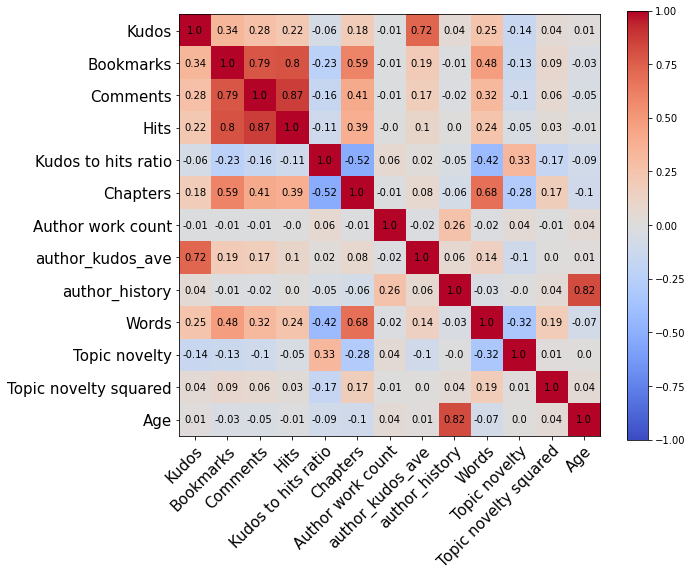

In [142]:
labels = corr.columns.values
fig, ax = plt.subplots(figsize = (10,10))

# kmin = np.amin(corr.as_matrix())
# kmax = np.amax(corr.as_matrix())

norm = colors.Normalize(vmin = -1, vmax = 1)
im = ax.imshow(corr, norm=norm,cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize='15')

plt.setp(ax.get_yticklabels(), fontsize='15')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, round(corr.values[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title("")
fig.colorbar(im, shrink=0.7)
fig.tight_layout()
plt.savefig('variables_corr_20211216_topic_only_no_crossover_author_control.pdf', format='pdf')